<a href="https://colab.research.google.com/github/ArchXOX/PRODIGY_DS_04/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA LOADING AND CLEANING

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
%cd /content/drive/MyDrive/TASK 4

/content/drive/MyDrive/TASK 4


In [61]:
#Libraries
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
import seaborn as sns

from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
tweets=pd.read_csv("twitter_training.csv")
tweets.head(10)

2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   
5  2402  Borderlands  Positive   
6  2402  Borderlands  Positive   
7  2402  Borderlands  Positive   
8  2402  Borderlands  Positive   
9  2402  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
5  So I spent a few hours making something for fu...     
6  So I spent a couple of hours doing something f...     
7  So I spent a few hours doing something for fun...     
8  So I spent a few hours making something for fu...     
9  2010 So I spent a few hours making something f...

In [63]:
tweets.drop_duplicates(inplace=True)
tweets.dropna(inplace=True)

In [64]:
tweets.rename(columns={'2401':'Tweet ID','Borderlands':'Product','Positive':'Sentiment','im getting on borderlands and i will murder you all ,':'content'},inplace=True)
tweets.head()

Tweet ID      Product Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                             content  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...

In [65]:
print(tweets['Tweet ID'].unique())
print(tweets.shape)

[2401 2402 2403 ... 9198 9199 9200]
(71655, 4)


# DATA PREPROCESSING AND SENTIMENT ANALYSIS

In [66]:
#Removing retweet marker
def remove_rt(x):
  return re.sub('RT @\w+: ', " ", x)

#Removing mentions,punctuations and URLs
def rt(x):
  return re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)

tweets['content']=tweets['content'].map(remove_rt).map(rt)
tweets['content']=tweets['content'].str.lower()

In [67]:
#SENTIMENT ANALYSIS

nltk.download('vader_lexicon')

#Iniatializing the VADER Sentiment Intensity Analyzer once
sia=SentimentIntensityAnalyzer()

#Vectorized TextBlob sentiment analysis for polarity and subjectivity
tweets[['polarity','subjectivity']]=tweets['content'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

#Vectorized sentiment analysis for neg,pos,neu,comp
vader_scores=tweets['content'].apply(sia.polarity_scores)

#VADER scores from dictionaries to dataframe
vader_df=pd.DataFrame(vader_scores.tolist(),index=tweets.index)

#Concatenating VADER scores columns to original dataframe
tweets=pd.concat([tweets,vader_df],axis=1)

#Determining sentiment based on VADER scores
tweets['sentiment']=tweets.apply(lambda row:'negative' if row['neg']>row['pos'] else('positive' if row['neg']<row['pos'] else 'neutral'),axis=1)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [68]:
tweets[['content','sentiment','polarity','subjectivity','neg','neu','pos']].head(5)

content sentiment  polarity  \
0  i am coming to the borders and i will kill you...  negative       0.0   
1  im getting on borderlands and i will kill you ...  negative       0.0   
2  im coming on borderlands and i will murder you...  negative       0.0   
3  im getting on borderlands 2 and i will murder ...  negative       0.0   
4  im getting into borderlands and i can murder y...  negative       0.0   

   subjectivity    neg    neu  pos  
0           0.0  0.343  0.657  0.0  
1           0.0  0.370  0.630  0.0  
2           0.0  0.370  0.630  0.0  
3           0.0  0.343  0.657  0.0  
4           0.0  0.370  0.630  0.0

In [69]:
grouped=tweets.groupby('Product')

for product,group in grouped:
  total_tweets=len(group)
  total_pos=len(group.loc[group['sentiment']=='positive'])
  total_neg=len(group.loc[group['sentiment']=='negative'])
  total_neu=len(group.loc[group['sentiment']=='neutral'])

  print(f"Product : {product}\n")
  print("Total Positive Tweets% : {:.2f}".format((total_pos/total_tweets)*100))
  print("Total Negative Tweets% : {:.2f}".format((total_neg/total_tweets)*100))
  print("Total Neutral Tweets% : {:.2f}".format((total_neu/total_tweets)*100))
  print("-"*50)

Product : Amazon

Total Positive Tweets% : 68.52
Total Negative Tweets% : 24.28
Total Neutral Tweets% : 7.20
--------------------------------------------------
Product : ApexLegends

Total Positive Tweets% : 47.67
Total Negative Tweets% : 33.71
Total Neutral Tweets% : 18.61
--------------------------------------------------
Product : AssassinsCreed

Total Positive Tweets% : 61.36
Total Negative Tweets% : 24.35
Total Neutral Tweets% : 14.29
--------------------------------------------------
Product : Battlefield

Total Positive Tweets% : 39.11
Total Negative Tweets% : 52.42
Total Neutral Tweets% : 8.47
--------------------------------------------------
Product : Borderlands

Total Positive Tweets% : 58.50
Total Negative Tweets% : 26.39
Total Neutral Tweets% : 15.10
--------------------------------------------------
Product : CS-GO

Total Positive Tweets% : 56.08
Total Negative Tweets% : 28.52
Total Neutral Tweets% : 15.40
--------------------------------------------------
Product : Call

# FEATURE EXTRACTION

In [70]:
nltk.download('stopwords')

tw_list=tweets[['content']].copy()

def clean_text(text):

    #Removing punctuation
    text=''.join([char for char in text if char not in string.punctuation])
    text=re.sub('[0-9]+','',text)

    #Tokenization
    text=re.split('\W+',text)

    #Removing stopwords
    stop_words=nltk.corpus.stopwords.words('english')
    text=[word for word in text if word not in stop_words]

    #Applying Stemmer
    ps = nltk.PorterStemmer()
    text=[ps.stem(word) for word in text]

    return text

tw_list['cleaned']= tw_list['content'].apply(clean_text)
tw_list['cleaned_text'] =  tw_list['cleaned'].apply(lambda x: ' '.join(x))
tw_list.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


content  \
0  i am coming to the borders and i will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                            cleaned                cleaned_text  
0            [come, border, kill, ]           come border kill   
1     [im, get, borderland, kill, ]     im get borderland kill   
2  [im, come, borderland, murder, ]  im come borderland murder   
3   [im, get, borderland, murder, ]   im get borderland murder   
4   [im, get, borderland, murder, ]   im get borderland murder

In [71]:
# Ensuring that 'cleaned_text' column is available in grouped DataFrames:
tweets = pd.merge(tweets, tw_list[['cleaned_text']], left_index=True, right_index=True)

In [72]:
#Bag of Words model

grouped = tweets.groupby('Product')

top_words_per_product={}

for product,group in grouped:
  count_vectorizer=CountVectorizer()
  count_vector=count_vectorizer.fit_transform(group['cleaned_text'])
  count_vect_df=pd.DataFrame(count_vector.toarray(),columns=count_vectorizer.get_feature_names_out())

  #Most used words
  count=pd.DataFrame(count_vect_df.sum())
  count_df=count.sort_values(0,ascending=False).head(10)

  top_words_per_product[product]=count_df

  print(f"Top words for : {product}")
  print(count_df)
  print("-"*50)

Top words for : Amazon
           0
amazon  1903
com      489
play     299
win      281
chanc    263
thank    215
one      204
watch    199
see      192
card     191
--------------------------------------------------
Top words for : ApexLegends
             0
apex       458
game       388
com        332
legend     307
playapex   265
play       187
get        169
pic        150
love       142
rhandlerr  142
--------------------------------------------------
Top words for : AssassinsCreed
            0
assassin  924
creed     918
game      541
odyssey   266
look      253
play      247
love      238
like      232
com       176
new       163
--------------------------------------------------
Top words for : Battlefield
                0
battlefield  1336
player       1005
ban           942
com           694
see           508
bfdb          476
detail        425
game          404
occur         377
play          260
--------------------------------------------------
Top words for : Borderland

# DATA VISUALIZATION

In [73]:
#Pie charts

my_labels=['Positive','Negative','Neutral']
my_colors=['Yellow','Red','Blue']

num_products=len(grouped)

cols=3
rows=(num_products//cols)+(num_products%cols>0)

plt.figure(figsize=(12,5*rows),dpi=300)

for i, (product,group) in enumerate(grouped,1):
  total_pos=len(group.loc[group['sentiment']=='positive'])
  total_neg=len(group.loc[group['sentiment']=='negative'])
  total_neu=len(group.loc[group['sentiment']=='neutral'])

  plt.subplot(rows,cols,i)
  plt.title(f"{product}")

  my_explode=[0,0.2,0]
  plt.pie([total_pos,total_neg,total_neu], colors=my_colors, labels=my_labels, explode=my_explode, autopct='%1.1f%%')

plt.tight_layout()

plt.show()

**AMAZON** - There is an overall positive sentiment of 60% among customers, showing an above average level satisfaction

**VIDEO GAMES** - Ranked based on most to least positive sentiment

1) Assassins creed and Hearthstone - 61%

2) Borderlands - 58%

3) World of craft, CS-GO - 56%

4) Cyberpunk2077 - 54%

5) Overwatch , Xbox - 52%

6) League of Legends , DOTA2 - 50%

7) Apex legends, GTA - 48%

8) COD, Tom Clancy (Ghost), Tom Clancy (Rainbow6), PUBG - 46%

9) Fortnite - 45%

10) FIFA - 44%

11) PS5, COD Blackops - 41%

12) Battlefield - 39%

13) Madden NFL - 37%

14) NBA2K - 36%

15) RDR - 27%

**FACEBOOK** - 38% Positive and 50% Negative

**GOOGLE** - 50%

**HOME DEPOT** - 49%

**MICROSOFT** - 49%

**NVIDIA** - 50%

**VERIZON** - 40%

**JOHNSON & JOHNSON** - 34% Positive and 49% Negative


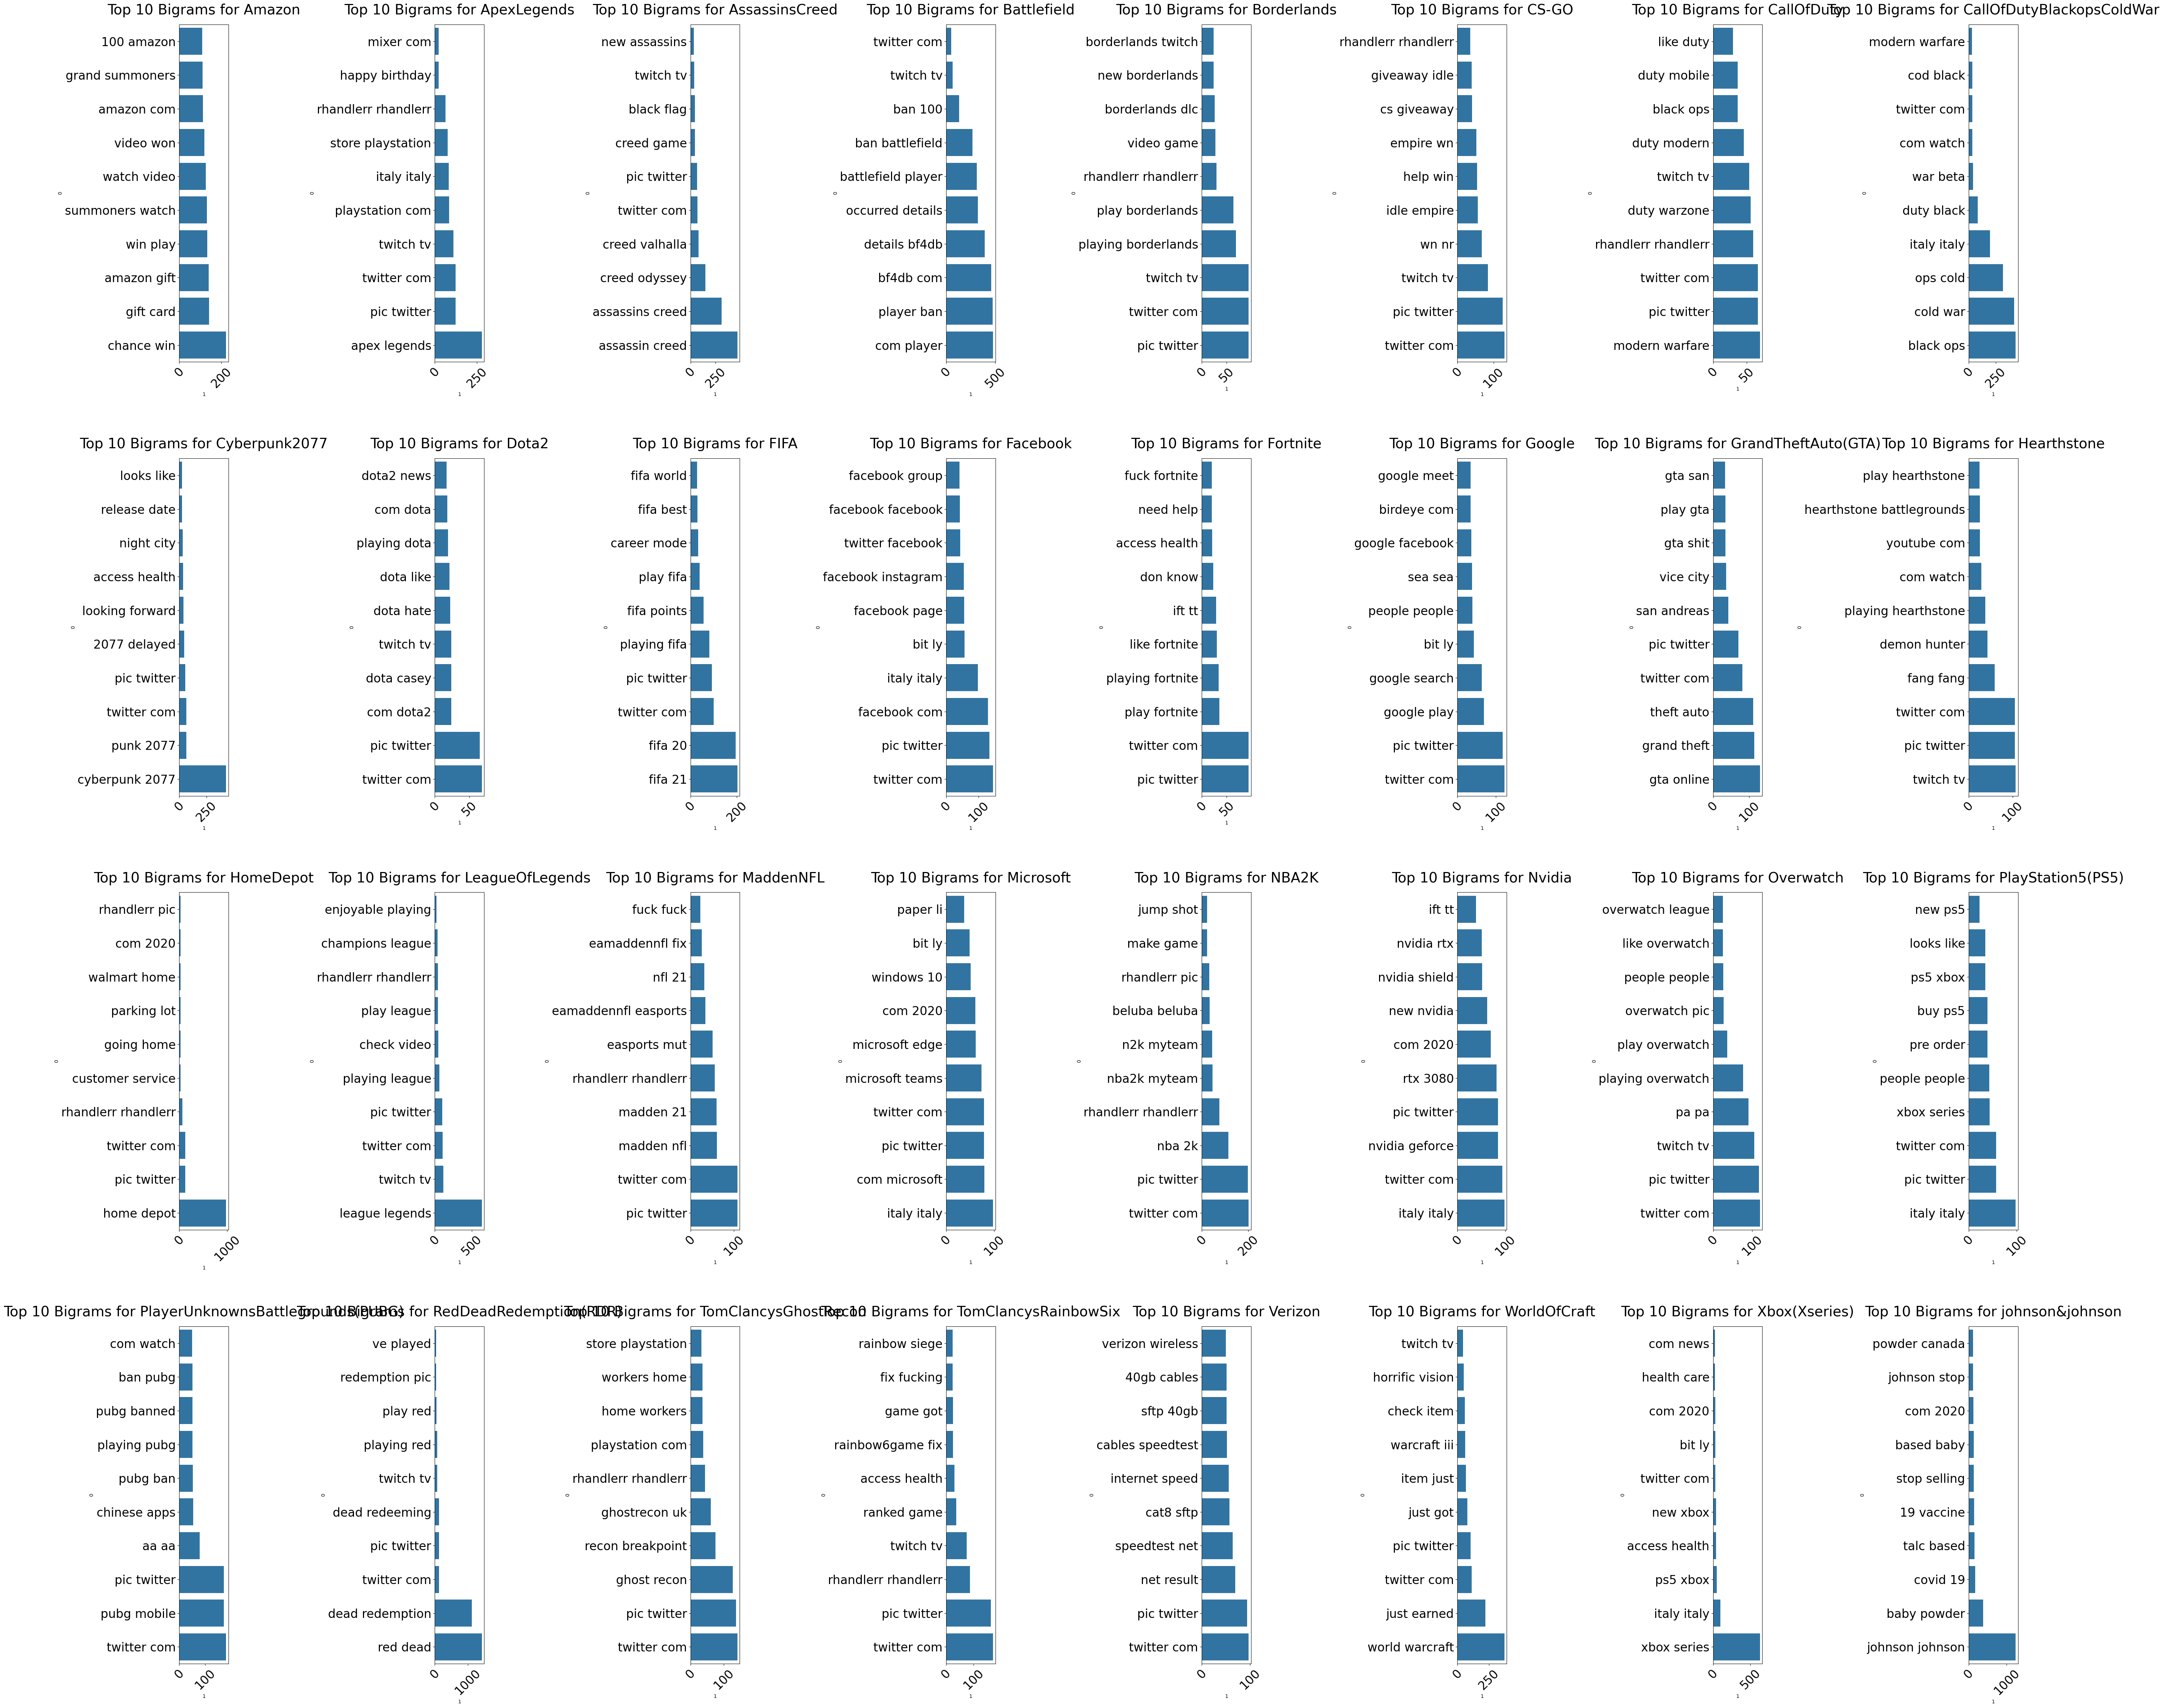

In [74]:
#N-grams

def get_top_n_grams(corpus,ngram_range,n=None):
  vec=CountVectorizer(ngram_range=ngram_range,stop_words='english').fit(corpus)
  bag_of_words=vec.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  word_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  word_freq=sorted(word_freq,key=lambda x:x[1],reverse=True)
  return word_freq[:n]

grouped=tweets.groupby('Product')
num_products=len(grouped)

rows,cols = 4,8
rows = (num_products + cols - 1) // cols
fig,axes=plt.subplots(rows,cols,figsize=(55,50))
axes=axes.flatten()

for i,(product,group) in enumerate(grouped):

  #n2 bigram
  n2_bigrams=get_top_n_grams(group['content'],(2,2),10)
  sns_plot=sns.barplot(x=1,y=0,data=pd.DataFrame(n2_bigrams),ax=axes[i])

  axes[i].set_title(f"Top 10 Bigrams for {product}", pad=20, fontsize=28)
  axes[i].tick_params(axis='x', rotation=45, labelsize=24)
  axes[i].tick_params(axis='y', labelsize=24)
  axes[i].invert_yaxis()

plt.tight_layout(rect=[0, 0, 1, 0.95],h_pad=7, w_pad=7)

plt.savefig('all bigrams collection',dpi=600)

plt.show()